In [1]:
"""
TOF:counting dE/dx and time difference of TOF
@aurthor Jiancheng Zeng
@September 20 2021
"""

'\nTOF:counting dE/dx and time difference of TOF\n@aurthor Jiancheng Zeng\n@September 20 2021\n'

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import statistics
from numpy import array
import pandas as pd

data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_proton.dat")
print("finish reading data!")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""
print("\n Recognize events ...")
s = 0
for s in range(len(event[:,0])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)

identical.append(len(event))

Reading data ...
finish reading data!
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...


In [92]:
TOF_out_pbar_E = []
TOF_out_pbar_T = []
TOF_in_pbar_E = []
TOF_in_pbar_T = []

for i in range(len(selection)):
    tempout = 0
    tempin = 0
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-2212'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' and selection[i][m][3] == '-2212'):
                    tempin = tempin + float(selection[i][m][9])
                elif(selection[i][m][5] == '-10000' and selection[i][m][3] == '-2212'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_pbar_E.append(tempout)
            TOF_in_pbar_E.append(tempin)
            break
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-2212'):
            for o in range(selection[i].shape[0]):
                if(selection[i][o][5] == '-11000' and selection[i][o][3] == '-2212'):
                    TOF_in_pbar_T.append(selection[i][o][7])
                    break
            for p in range(selection[i].shape[0]):
                if(selection[i][p][5] == '-10000' and selection[i][p][3] == '-2212'):
                    TOF_out_pbar_T.append(selection[i][p][7])
                    break
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification finished!")

TOF data process:99%
 identification finished!


finished!


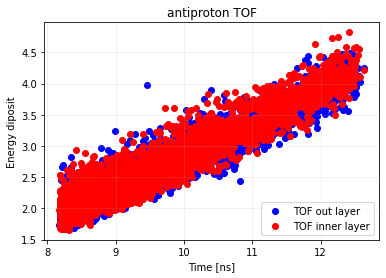

In [103]:
#dE = array([float(i) for i in TOF_out_pbar_E]) - array([float(i) for i in TOF_in_pbar_E])
time = array([float(i) for i in TOF_in_pbar_T]) - array([float(i) for i in TOF_out_pbar_T])
dEOut = array([float(i) for i in TOF_out_pbar_E])
dEIn = array([float(i) for i in TOF_in_pbar_E])
#plt.scatter(time, dE)
plt.scatter(time, dEOut, color = 'b', label = 'TOF out layer')
plt.scatter(time, dEIn, color = 'r', label = 'TOF inner layer')
plt.title('antiproton TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
#plt.axis([0, 20, 0, 10])
plt.grid(alpha = 0.2)
np.savetxt('/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/time_antiproton.txt', time, delimiter = '\t ', fmt='%.6s')
print("finished!")

In [54]:
data = []
event = []
identical = []

"""
Read data from total data file
--------------------
"""
print("Reading data ...")
data = pd.read_table("/Users/jiancheng/CloudDocuments/Documents/Github/GRAMS/GRAMS_2021/output/TOF/TOF_anti_He3.dat")
print("finish reading data!")

"""
modification
"""
print("Modifing data ...")
for i in range(len(data.iloc[:,0])):
    if(0 <= data.iloc[i,2] <= 1):
        event.append(list(data.iloc[i,:]))
    print("Modifing process:"+str(int(100*i/len(data.iloc[:,0])))+"%", end='\r')
event = np.array(event)
print("\n finished!")

"""
recognize the data file length distribution
"""
print("\n Recognize events ...")
s = 0
for s in range(len(event[:,0])-1):
    if(int(event[s,0]) != int(event[s+1,0])):
        identical.append(s+1)
    print("Recognizing process:"+str(int(100*s/len(event[:,0])))+"%", end='\r')
    #time.sleep(0.001)
selection = np.split(event, identical)

identical.append(len(event))
print("\n finished!")

Reading data ...
finish reading data!
Modifing data ...
Modifing process:99%
 finished!

 Recognize events ...


In [80]:
TOF_out_He3bar_E = []
TOF_out_He3bar_T = []
TOF_in_He3bar_E = []
TOF_in_He3bar_T = []

for i in range(len(selection)):
    tempout = 0
    tempin = 0
    for j in range(selection[i].shape[0]):
        if(selection[i][j][6] == 'LAr' and selection[i][j][3] == '-1000020030'):
            for m in range(selection[i].shape[0]):
                if(selection[i][m][5] == '-11000' and selection[i][m][3] == '-1000020030'):
                    tempin = tempin + float(selection[i][m][9])
                elif(selection[i][m][5] == '-10000' and selection[i][m][3] == '-1000020030'):
                    tempout = tempout + float(selection[i][m][9])
            TOF_out_He3bar_E.append(tempout)
            TOF_in_He3bar_E.append(tempin)
            break
    for k in range(selection[i].shape[0]):
        if(selection[i][k][6] == 'LAr' and selection[i][k][3] == '-1000020030'):
            for o in range(selection[i].shape[0]):
                if(selection[i][o][5] == '-11000' and selection[i][o][3] == '-1000020030'):
                    TOF_in_He3bar_T.append(selection[i][o][7])
                    break
            for p in range(selection[i].shape[0]):
                if(selection[i][p][5] == '-10000' and selection[i][p][3] == '-1000020030'):
                    TOF_out_He3bar_T.append(selection[i][p][7])
                    break
            break
    print("TOF data process:"+str(int(100*i/len(selection)))+"%", end='\r')

print("\n identification finished!")

TOF data process:99%
 identification finished!


In [81]:
print(len(TOF_out_He3bar_E))
print(len(TOF_in_He3bar_E))
print(len(TOF_out_He3bar_T))
print(len(TOF_in_He3bar_T))

2616
2616
2616
2616


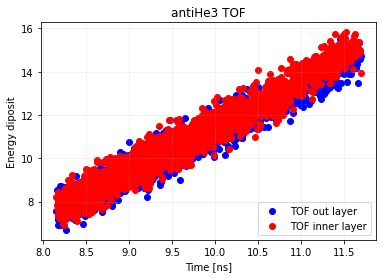

In [102]:
#dE = array([float(i) for i in TOF_out_He3bar_E]) - array([float(i) for i in TOF_in_pbar_E])
time_He3bar = array([float(i) for i in TOF_in_He3bar_T]) - array([float(i) for i in TOF_out_He3bar_T])
dEOut_He3bar = array([float(i) for i in TOF_out_He3bar_E])
dEIn_He3bar = array([float(i) for i in TOF_in_He3bar_E])
#plt.scatter(time, dE)
plt.scatter(time_He3bar, dEOut_He3bar, color = 'b', label = 'TOF out layer')
plt.scatter(time_He3bar, dEIn_He3bar, color = 'r', label = 'TOF inner layer')
plt.title('antiHe3 TOF')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='lower right')
plt.grid(alpha = 0.2)
#plt.axis([0, 20, 0, 20])


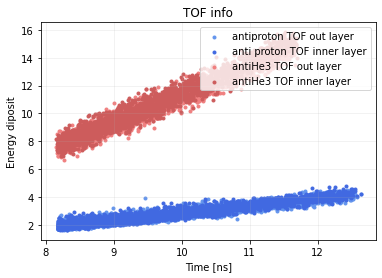

In [101]:
plt.scatter(time, dEOut, marker = '.', color = 'cornflowerblue', label = 'antiproton TOF out layer')
plt.scatter(time, dEIn, marker = '.', color = 'royalblue', label = 'anti proton TOF inner layer')
plt.scatter(time_He3bar, dEOut_He3bar, marker = '.', color = 'lightcoral', label = 'antiHe3 TOF out layer')
plt.scatter(time_He3bar, dEIn_He3bar, marker = '.', color = 'indianred', label = 'antiHe3 TOF inner layer')
plt.title('TOF info')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='upper right')
plt.grid(alpha = 0.2)
#plt.axis([0, 140, 0, 80])

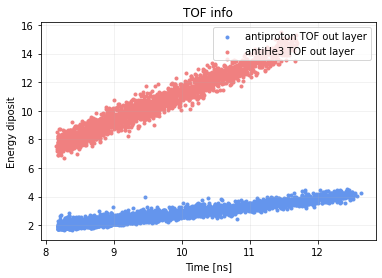

In [100]:
plt.scatter(time, dEOut, marker = '.', color = 'cornflowerblue', label = 'antiproton TOF out layer')
#plt.scatter(time, dEIn, marker = '.', color = 'royalblue', label = 'anti proton TOF inner layer')
plt.scatter(time_He3bar, dEOut_He3bar, marker = '.', color = 'lightcoral', label = 'antiHe3 TOF out layer')
#plt.scatter(time_He3bar, dEIn_He3bar, marker = '.', color = 'indianred', label = 'antiHe3 TOF inner layer')
plt.title('TOF info')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='upper right')
plt.grid(alpha = 0.2)
#plt.axis([0, 20, 0, 20])

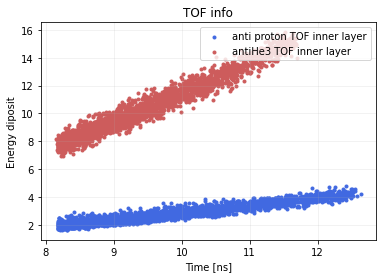

In [99]:
#plt.scatter(time, dEOut, marker = '.', color = 'cornflowerblue', label = 'antiproton TOF out layer')
plt.scatter(time, dEIn, marker = '.', color = 'royalblue', label = 'anti proton TOF inner layer')
#plt.scatter(time_He3bar, dEOut_He3bar, marker = '.', color = 'lightcoral', label = 'antiHe3 TOF out layer')
plt.scatter(time_He3bar, dEIn_He3bar, marker = '.', color = 'indianred', label = 'antiHe3 TOF inner layer')
plt.title('TOF info')
plt.xlabel('Time [ns]')
plt.ylabel('Energy diposit')
plt.legend(loc='upper right')
plt.grid(alpha = 0.2)
#plt.axis([0, 140, 0, 80])